## 28.07 COP 4045 Assignment 9 

In this assignment I will build a classifier for the Pima Indians diabetes dataset.

In [42]:
import matplotlib.pyplot as plt # import matplotlib since I am going to build some plots 
import math # import math library to compute the distance (in the k nearest neighbors algorithm)

Read the data from the csv file

In [37]:
with open('diabetes.csv', 'r') as file:
    raw_data = [line.strip().split(',') for line in file.readlines()]
titles = raw_data[0]
print(*titles, sep=' ')

Pregnancies Glucose BloodPressure SkinThickness Insulin BMI DiabetesPedigreeFunction Age Outcome


Convert it into a convenient form

In [38]:
data = {}
for i, key in enumerate(titles):
    data[key] = [float(x[i]) for x in raw_data[1:]]

Plot the histograms for different features

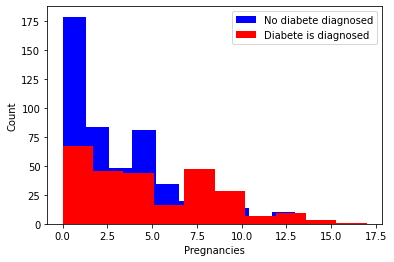

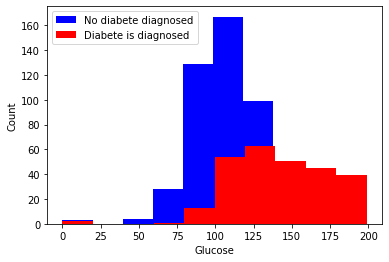

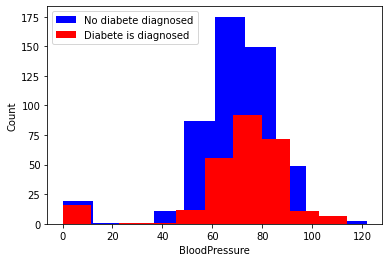

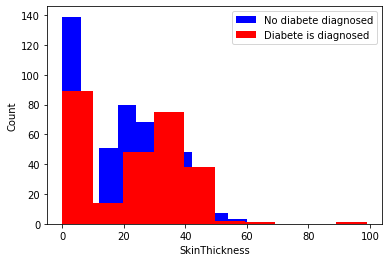

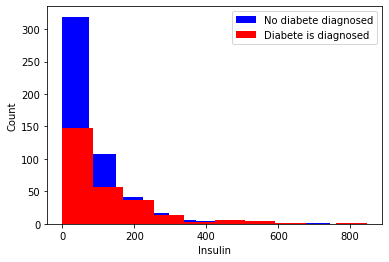

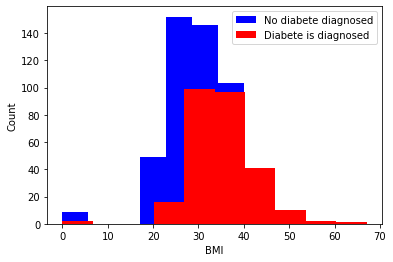

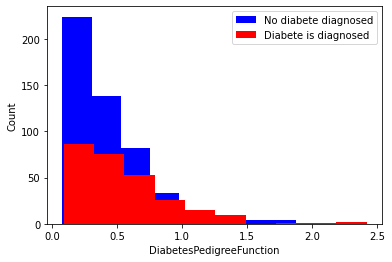

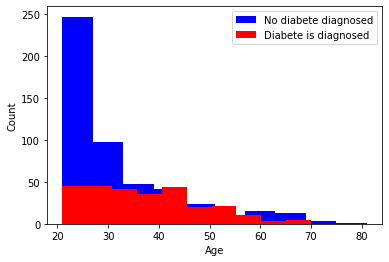

In [39]:
for title in titles[:-1]:
    plt.hist([data[title][i] for i in range(len(data[title])) if (data['Outcome'][i] == 0)], color='blue', label='No diabete diagnosed')
    plt.hist([data[title][i] for i in range(len(data[title])) if (data['Outcome'][i] == 1)], color='red', label='Diabete is diagnosed')
    plt.xlabel(title)
    plt.ylabel('Count')
    plt.legend()
    plt.show()

Now I will write a class that works as a classifier

In [48]:
# This class is a classifier that works using the k nearest neighbors algorithm
class KNN_Classifier:
    def __init__(self):
        pass

    # This function splits the given data into training data and testing data
    def split_test_train(self, data, test_size=0.3):
        tests_num = int(len(data) * test_size)
        test = data[0:tests_num]
        train = data[tests_num:]
        return (train, test)

    def split_test_and_train_data(self, xdata, ydata, test_size=0.3):
        xtrain, xtest = self.split_test_train(xdata, test_size=test_size)
        ytrain, ytest = self.split_test_train(ydata, test_size=test_size)

        return (xtrain, xtest, ytrain, ytest)

    # This function just copies the values for training. The main logic happens in the predict() function
    def train(self, xtrain, ytrain):
        self.xtrain = xtrain
        self.ytrain = ytrain

    # This function computes the euclidian distance between two points in a multi-dimensional space
    # It is used to calculate the difference between two feature sets (multi-dimensional points)
    def euc_distance(test_features, train_features):
        return math.sqrt(sum([(test_features[i] - train_features[i]) ** 2 for i in range(len(test_features))]))

    # This function finds the closest set of features to the given one (the closest multi-dimensional point)
    def closest_point(self, features, past=[]):
        best_distance = KNN_Classifier.euc_distance(features, xtrain[0])
        best_index = 0
        for i in range(1, len(self.xtrain)):
            d = KNN_Classifier.euc_distance(features, xtrain[i])
            if (d < best_distance and d not in past):
                best_distance = d
                best_index = i
        return (best_distance, ytrain[best_index])

    # This function is the implementation of knn algorithm.
    # By looking at the nearest n points this function finds out which group of points the given point belongs to
    def knn(self, features, n):
        nearest_neighbors = []
        outputs = {}
        for i in range(n):
            point = self.closest_point(features, past=nearest_neighbors)
            nearest_neighbors.append(point[0])
            if (point[1] in outputs):
                outputs[point[1]] += 1
            else:
                outputs[point[1]] = 1
        return max(outputs, key=lambda key: outputs[key])

    # This function predicts the outcome for the given input data
    def predict(self, xtest):
        result = []
        for x in xtest:
            result.append(self.knn(x, 3))
        return result


In [52]:
# Testing code
xdata = [[data[title][i] for title in titles[:-1]] for i in range(len(data['Outcome']))]
ydata = data['Outcome']

model = KNN_Classifier()
xtrain, xtest, ytrain, ytest = model.split_test_and_train_data(xdata, ydata, test_size=0.3)

model.train(xtrain, ytrain)
correct_cases = 0
true_negatives = 0
true_positives = 0
false_negatives = 0
false_positives = 0
labels = model.predict(xtest)
for i in range(len(labels)):
    if (labels[i] == ytest[i]):
        correct_cases += 1
        if (labels[i] == 0):
            true_negatives += 1
        else:
            true_positives += 1
    else:
        if (labels[i] == 0):
            false_negatives += 1
        else:
            false_positives += 1
print('Correctness coeff:', correct_cases / len(ytest))
# it's about 65% since the dataset is rather small
print('True negatives:', true_negatives)
print('True positives:', true_positives)
print('False negatives:', false_negatives)
print('False positives:', false_positives)



Correctness coeff: 0.6956521739130435
True negatives: 115
True positives: 45
False negatives: 42
False positives: 28


## Conclusion

In this assignment I have learned to implement a classifier for Pima Indians diabetes dataset.